<a href="https://colab.research.google.com/github/PawanSths/AI-algorithms/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


New Point 1: {'Age': 27, 'Salary': 65000}
   Age  Salary Class      Distance  Rank
1   35   67350     B   2350.013617     1
8   31   54900     A  10100.000792     2
7   39   76420     B  11420.006305     3
4   30   52800     A  12200.000369     4
3   41   82100     B  17100.005731     5
0   28   45200     A  19800.000025     6
6   26   41750     A  23250.000022     7
5   45   90500     B  25500.006353     8
2   22   38900     A  26100.000479     9
9   50   98800     B  33800.007825    10
Predicted Class: B

New Point 2: {'Age': 21, 'Salary': 15000}
   Age  Salary Class      Distance  Rank
2   22   38900     A  23900.000021     1
6   26   41750     A  26750.000467     2
0   28   45200     A  30200.000811     3
4   30   52800     A  37800.001071     4
8   31   54900     A  39900.001253     5
1   35   67350     B  52350.001872     6
7   39   76420     B  61420.002638     7
3   41   82100     B  67100.002981     8
5   45   90500     B  75500.003815     9
9   50   98800     B  83800.005018

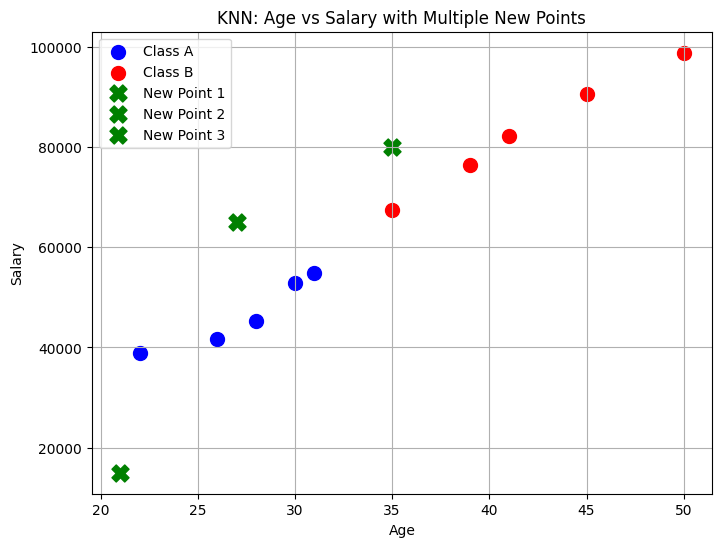

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Age': [28, 35, 22, 41, 30, 45, 26, 39, 31, 50],
    'Salary': [45200, 67350, 38900, 82100, 52800, 90500, 41750, 76420, 54900, 98800],
    'Class': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
}
df = pd.DataFrame(data)

new_points = [
    {'Age': 27, 'Salary': 65000},
    {'Age': 21, 'Salary': 15000},
    {'Age': 35, 'Salary': 80000}
]

K = 3
colors = {'A': 'blue', 'B': 'red'}

plt.figure(figsize=(8, 6))
for label in df['Class'].unique():
    subset = df[df['Class'] == label]
    plt.scatter(subset['Age'], subset['Salary'], c=colors[label], label=f'Class {label}', s=100)

for idx, point in enumerate(new_points, 1):
    df['Distance'] = np.sqrt((df['Age'] - point['Age'])**2 + (df['Salary'] - point['Salary'])**2)
    df['Rank'] = df['Distance'].rank(method='first').astype(int)
    df_sorted = df.sort_values('Rank')

    print(f"\nNew Point {idx}: {point}")
    print(df_sorted[['Age', 'Salary', 'Class', 'Distance', 'Rank']])
    nearest_neighbors = df_sorted.head(K)
    predicted_class = nearest_neighbors['Class'].mode()[0]
    print(f"Predicted Class: {predicted_class}")

    plt.scatter(point['Age'], point['Salary'], c='green', s=150, marker='X', label=f'New Point {idx}')

plt.title('KNN: Age vs Salary with Multiple New Points')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()
